{Introduction}
The main purpose of this work is to apply a 1D Refined Model for an accurate Free Vibration Analysis of a Launcher Structure.
In this tutorial I will show how to implement this Method for a simple full beam like that shown in the following figure.

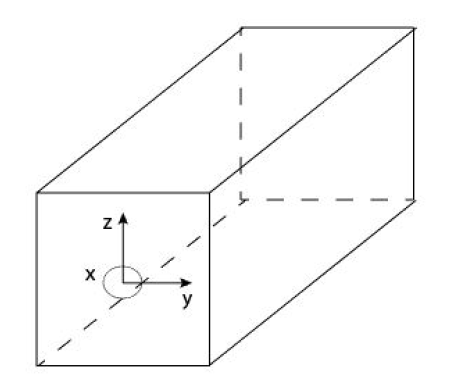

The Refined 1D Model aims to do the analysis of any structure through a minor number of degrees of freedom compared to the traditional 3DFEM. 

{Preliminary equations and definitions}
The displacement vector u(x; y; z) can be expressed
through its components ux, uy and uz.

\begin{equation}
    u=\{u_x,u_y,u_z\}^T
\end{equation}

Similarly the stress $\sigma$ and the deformation $\epsilon$ can be expressed as follows:

\begin{equation}
    \sigma=\{\sigma_{xx},\sigma_{yy},\sigma_{zz},\sigma_{xz},\sigma_{yz},\sigma_{xy}\}^T
\end{equation}

\begin{equation}
    \epsilon=\{\epsilon_{xx},\epsilon_{yy},\epsilon_{zz},\epsilon_{xz},\epsilon_{yz},\epsilon_{xy}\}^T
\end{equation}

Linear strain-displacement relations are used:

\begin{equation}
    \sigma=[D]u
\end{equation}

where $[D]$ is defined as fallows:

\begin{equation}
    [D]=\left[\begin{matrix} \frac{\delta}{\delta x} & 0 & 0\\ 0 & \frac{\delta}{\delta y} & 0\\ 0 & 0 & \frac{\delta}{\delta z}\\ \frac{\delta}{\delta z} & 0 & \frac{\delta}{\delta x}\\ 0 & \frac{\delta}{\delta z} & \frac{\delta}{\delta y} \\ \frac{\delta}{\delta y} & \frac{\delta}{\delta x} & 0\end{matrix}\right]
\end{equation}

Hooke's law can be used to derive the stress field by considering an elastic and isotropic material :

\begin{equation}
    \sigma=C\epsilon
\end{equation}

where $C$ for an isotropic material is defined as follows:

\begin{equation}
    C=S^{-1}=\left[ \begin{matrix} \frac{1}{E} & -\frac{\nu}{E} &-\frac{\nu}{E} & 0 & 0 & 0 \\ -\frac{\nu}{E} & \frac{1}{E} & -\frac{\nu}{E}  & 0 & 0 & 0 \\ -\frac{\nu}{E} & -\frac{\nu}{E} & \frac{1}{E} & 0 & 0 & 0 \\ 0 & 0 & 0 & \frac{1}{G} & 0 & 0\\ 0 & 0 & 0 & 0 & \frac{1}{G} & 0\\  0 & 0 & 0 & 0 & 0 & \frac{1}{G}\end{matrix}  \right]^{-1}
\end{equation}



{Refined one-dimensional model}

According to the main hypothesis of the 1D Refined Model, the displacement $u$ is written as the product of two contributions, a function expansion $F_\tau$ over the cross-section and the unknown displacement $u_\tau$ on the x-axis:

\begin{equation}
    u=F_\tau u_\tau
\end{equation}

where the subscript notation in the previous equation means summation.

Over the cross-section, both Taylor or Lagrange expansions could be used.


{Taylor Expansion}

Taylor-like polynomials consist of 2D base $y^iz^j$ functions, where $i$ and $j$ are positive integers.

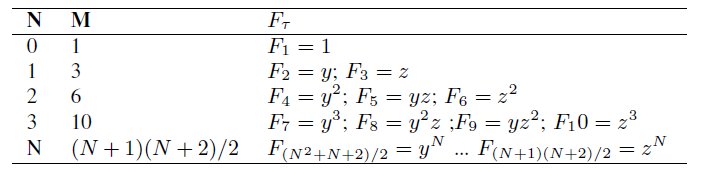


For instance, the displacement field of the second-order model TE2 (N=2, M=6) is expressed as:

\begin{equation}
    u_x(x,y,z)=u_{x_1}+yu_{x_2}+zu_{x_3}+y^2u_{x_4}+yzu_{x_5}+z^2u_{x_6}
\end{equation}
\begin{equation}
    u_y(x,y,z)=u_{y_1}+yu_{y_2}+zu_{y_3}+y^2u_{y_4}+yzu_{y_5}+z^2u_{y_6}
\end{equation}
\begin{equation}
    u_z(x,y,z)=u_{z_1}+yu_{z_2}+zu_{z_3}+y^2u_{z_4}+yzu_{z_5}+z^2u_{z_6}
\end{equation}

The Timoshenko beam theory (TBT) can be derived as a particular case of this formulation by considering only some terms of the TE1 expansion:

\begin{equation}
    u_x=u_{x_1}+yu_{x_2}+zu_{x_3}
\end{equation}
\begin{equation}
    u_y=u_{y_1}
\end{equation}
\begin{equation}
    u_z=u_{z_1}
\end{equation}

The Euler-Bernoulli beam theory can be derived by imposing a constraint on shear terms in order to obtain: $u_{x_2}=\frac{\delta u_x}{\delta x}$ and $u_{y_3}=\frac{\delta u_y}{\delta y}$.


{Lagrange Expansions}

The Lagrange (LE) expansions have the following main features:
    -LE model degrees of freedom can be located directly above the physical surfaces of the CAD structure. This characteristic is particular relevant if the transverse section is not so simple;
    -Locally refined models can be easily built since Lagrange polynomials sets can be arbitrarily spread above the cross-section.

Lagrange polynomials are usually given in terms of normalized coordinates. This choice is not compulsory but it offers several advantages. The simplest quadrilateral Lagrange polynomial is the four-point L4 set  whose polynomials are given by the following equation :

\begin{equation}
    F_{\tau}=\frac{1}{4}(1+\alpha\alpha_{\tau})(1+\beta\beta_{\tau})
\end{equation}
where $\alpha_{\tau}$ and $\beta_{\tau}$ represent the normalised coordinates LE4 nodes.

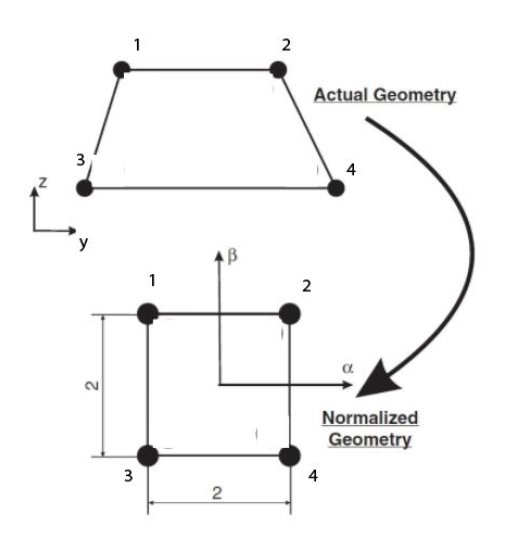


The second possible L-set is given by L9 (fig.\ref{fig:L9}) and its polynomials are the following ones:
\begin{equation}
    F_{1,3,5,7}=\frac{1}{4}(\alpha^2+\alpha\alpha_{\tau})(\beta^2+\beta\beta_{\tau})  
\end{equation}

\begin{equation}
    F_{2,4,6,8}=\frac{1}{2}\beta^2_{\tau}(\beta^2+\beta\beta_{\tau})(1-\alpha^2)+\frac{1}{2}\alpha^2_{\tau}(\alpha^2+\alpha\alpha_{\tau})(1-\beta^2)
\end{equation}

\begin{equation}
    F_{9}=(1-\alpha^2)(1-\beta^2)
\end{equation}
where $\alpha_{\tau}$ and $\beta_{\tau}$ represent the normalised coordinates LE9 nodes.

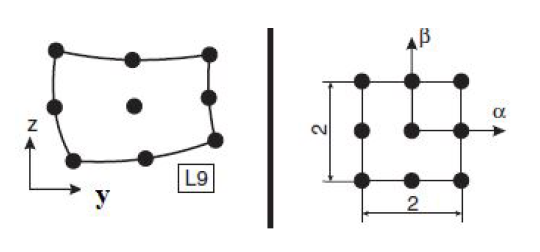


{Isoparamentric functions}
As we will see, computations of stiffeness and mass matrix needs the evualuation of integrals like:

\begin{equation}
    \int_A F_{\tau,y}F_{s,z}dydz
\end{equation}

If normalized coordinates (\alpha e \beta) are accounted for, the integrals can be computed over a fixed 2D domain, regardless of the actual geometry. For instance, in the case of quadrilateral domains.

\begin{equation}
\int_A F_{\tau,y}F_{s,z}dydz=\int_{-1}^1 \int_{-1}^1 F_{\tau,x}(\alpha,\beta)F_{\tau,z}(\alpha,\beta)\mid J(\alpha,\beta)\mid d\alpha d\beta
\end{equation}

As consequence, partial derivatives have to be computed:
\begin{equation}
F_{\tau ,\alpha}=F_{\tau,y}x_{,\alpha}+F_{\tau,z}z_{,\alpha}
\end{equation}

\begin{equation}
F_{\tau ,\beta}=F_{\tau,y}x_{,\beta}+F_{\tau,z}z_{,\beta}
\end{equation}

We can define the Jacobian matrix of the isoparametric transformation as follows:

\begin{equation}
J=\left[ \begin{matrix} y_{,\alpha} & z_{,\alpha}
\\  y_{,\beta} & z_{,\beta}
   \end{matrix}  \right]
\end{equation}

The inverse relationship provides the partial derivatives:

\begin{equation}
    \begin{Bmatrix} F_{\tau , y}\\ F_{\tau , z}\end{Bmatrix}=\frac{1}{\mid J \mid} \left[ \begin{matrix} z_{,\beta} & -z_{,\alpha}
\\  -y_{,\beta} & y_{,\alpha} 
   \end{matrix}  \right] \begin{Bmatrix} F_{\tau , alpha}\\ F_{\tau , beta}\end{Bmatrix}
\end{equation}

The term parametric means that the same functiona are adopted to interpolate the displacement field and the geometry of a structure element. In the case of L4, we will hold:

\begin{equation}
    y=F_1y_1+F_2y_2+F_3y_3+F_4y_4
\end{equation}

\begin{equation}
    z=F_1z_1+F_2z_2+F_3z_3+F_4z_4
\end{equation}




{Cross-section multi-Lagrange-elements}

Cross-sections can be discretized by means of multiple LE elements. 
Multi-elements are generally used to refine the cross-section without increasing the polynomial expansion order.
By means of Multi-elements, Lagrange expansions allow to place the nodes one th physical surface of CAD and to perform locally refined meshes.
The following figure shows an example in which two L4 elements are used to model the cross section of a full square beam.

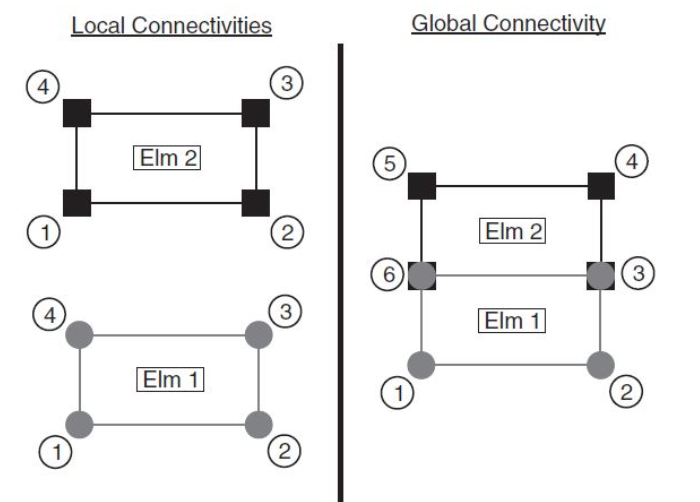


{Finite element approximation}

The FEM is used to approximate the solution along the $x$-axis. If the shape functions are introduced, the unknown displacement $u_\tau (x)$ becomes:

\begin{equation}
    u_\tau=N_i(x)q_{i\tau}
\end{equation}

where $q_{i\tau}$ are the degrees of freedom (DOFs) of the model.

The governing equation derives from the Principle of Virtual Displacement (PVD):

\begin{equation}
    \delta L_{def}+\delta L_{ine}=0
\end{equation}

where $\delta L_{def}$ stands for the strain energy while $\delta L_{ine}$ stands for the inertial work.

\begin{equation}
    \delta L_{def}=\int_V \delta\epsilon^T \sigma dV
\end{equation}

\begin{equation}
    \delta L_{def}=\int_V \delta q_{js}^T [ (N_j(x) F_s(y,z) D)^T C D F_{\tau}(y,z) N_i(x)] q_{i\tau} dV
\end{equation}

Through such a way, it is possible to define a stiffeness matrix for each node $K^{ij\tau s}$ with $\tau$ and $s$ that change from 0 to $nF$ where $nF$ is the ordre of the Lagrange expansion (in this case $nF=4$).

\begin{equation}
    K^{ij\tau s}=\int_V [ (N_j(x) F_s(y,z) D)^T C D F_{\tau}(y,z) N_i(x)] dV
\end{equation}

At the same way the mass matrix derives from the inertial work:

\begin{equation}
    \delta L_{ine} = \int_V \delta u^T \rho \frac{\delta^2 u}{\delta t^2} dV
\end{equation}

The last equation can be written as:

\begin{equation}
    \delta L_{ine} = \int_V \delta q_{js}^T [ (N_j(x) F_s(y,z) \rho F_{\tau}(y,z) N_i(x)] \frac{\delta^2 q_{i\tau}}{dt^2} dV 
\end{equation}

from which the mass matrix $M^{ij\tau s}$ for each node derives:

\begin{equation}
    M^{ij\tau s}= \int_V [ (N_j(x) F_s(y,z) \rho F_{\tau}(y,z) N_i(x)]  dV 
\end{equation}

The PVD can be written as 

\begin{equation}
    \delta q(M \frac{\delta^2 q}{\delta t^2} + Kq)=0
\end{equation}

Finally it is sufficient to solve the following eigvalue problem to calculate the natural frequences of the structure:

\begin{equation}
    (-\omega_k^2 M+K)q_k=0
\end{equation}



{Matrices Assembly}

The previous sections shows that the use of this model allows the matrices to be written in terms of the fundamental nucleus matrices $K_{ijs\tau}$ and $M_{ijs\tau}$, and these 3x3 matrices can be used to build the global stiffeness and mass matrices. The following figure shows the assembly procedure. The assembly procedure requires the use of five loops: the first and second loops are necessary to scan the indexes $\tau$ and $s$ from 1 to the number $M$ of the transverse expansion; the third and the fourth loops are required to scan indexes $i$ and $j$ referring to the nodes of each beam element.
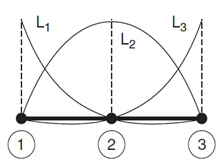



In the case represented before, each beam has 3 nodes so that indexes $i$ and $j$ will range from 1 to 3.
Finally a last loop is required to scan all the longitudinal elements of the structure.
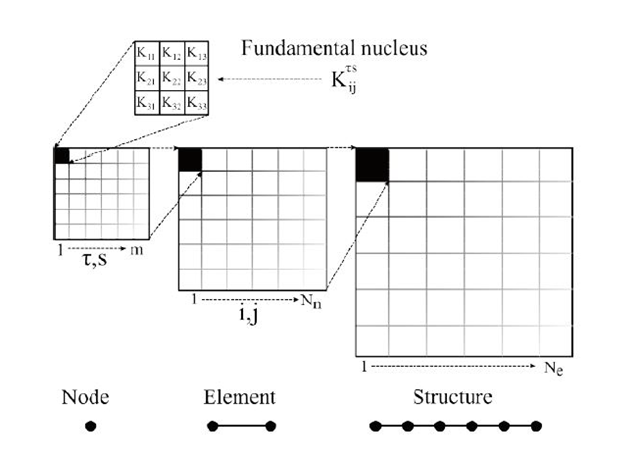

Moreover, when multi-Lagrange elements are use to discretise the cross-section, other two loops are required to scan the elements of the cross-section.
In the example where a square-beam cross-section is meshed by means of two different 4-nodes Lagrange elements, the general form of the mass/stiffeness matrix of a longitudinal node will be as represented in the followinf figure:
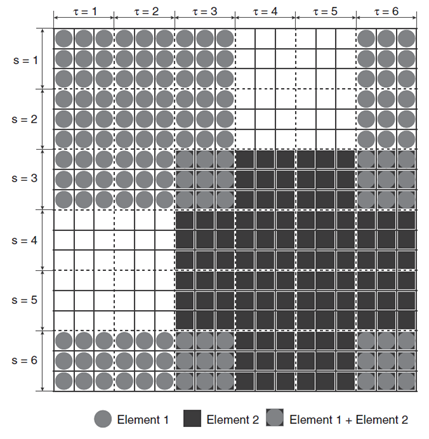

After all this theory, let's see the application of Lagrange expansion to a thin-walled beam.
In this file, 1LE4 element will be used to discretize the beam cross-section:
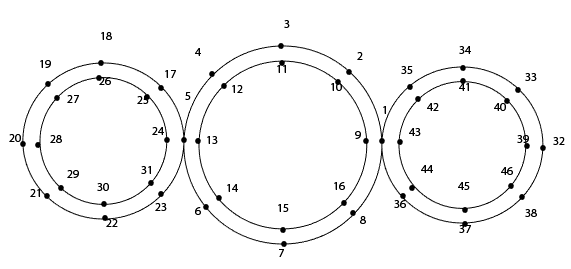

In [ ]:
import numpy as np
from numpy import linalg as LA
import pylab as pl
import math as Ma
import scipy.integrate as integ
import scipy.linalg as LAS
from sympy import Symbol
from numpy import matrix
import time
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.linalg import eig, eigh
from scipy.sparse.linalg import eigs,eigsh

"""Datas"""

bnod=3    #bnod is what in the previous sections has been referred as Nn, that is to say the number of nodes for each beam element
nF=4     #nF is what in the previous sections has been referres as M, that is to say the number of terms for each cross section expansion F_\tau
ne_t=24 # number of Lagrange elements that constitute the cross-section
nn_t=46 #number of nodes for the cross-section
ne_x=10   #number of longitudinal elements
nn_x=(bnod-1)*ne_x+1  #number of longitudinal nodes
R=1 #external rayon of cross-section
spess=0.1  #thickness of cross-section walls
Rb=0.6  #external rayon booster
tb=0.2  #booster's thickness
L=20  #longitudinal length of the beam
E=75*(10**9) #Young's Module
tau=0.33  #Poisson ratio
G=E/(2*(1+tau))  #Shear Elastic Constant
rho=2700     #density of material, I have supposed Alluminium
le=L/ne_x    #length of each beam element--> I have used a uniform longitudinal mesh


"""Cx= matrix where the i-th raw has the global index of i-th beam element's longitudinal nodes"""
Cx=[]
for i in range(0,ne_x):
    Cx.append([])
    
    Cx[i].append(i*2)
    Cx[i].append(i*2+1)
    Cx[i].append(i*2+2)
    
# If, for example, bnod was equal to 2-->
#Cx=[]
#for i in range(0,ne_x):
#    Cx.append([])
    
#    Cx[i].append(i)
#    Cx[i].append(i+1)
    

    """Matrix of elasticity for an isotropic material"""
S=np.array([[1/E,-tau/E,-tau/E,0,0,0],[-tau/E,1/E,-tau/E,0,0,0],[-tau/E,-tau/E,1/E,0,0,0],[0,0,0,1/G,0,0],[0,0,0,0,1/G,0],[0,0,0,0,0,1/G]])
C=np.linalg.inv(S)

F=[] #will contain the functions Ftau and its partial derivatives
Kel=[]  #will be the stiffness matrix of a beam element
N=[]  #will contain the interpolatin function along the longitudinal axis

Ctrav=[]  #will be the matrix were the i-th raw refers to the i-th Lagrange element of the cross-section--> the i-th raw will have the global enumaration of that element's nodes
Ctrav.append([2,1,10,9])
Ctrav.append([3,2,11,10])
Ctrav.append([4,3,12,11])
Ctrav.append([5,4,13,12])

Ctrav.append([13,14,5,6])
Ctrav.append([14,15,6,7])
Ctrav.append([15,16,7,8])
Ctrav.append([16,9,8,1])

Ctrav.append([17,5,25,24])
Ctrav.append([18,17,26,25])
Ctrav.append([19,18,27,26])
Ctrav.append([20,19,28,27])

Ctrav.append([28,29,20,21])
Ctrav.append([29,30,21,22])
Ctrav.append([30,31,22,23])
Ctrav.append([31,24,23,5])

Ctrav.append([33,32,40,39])
Ctrav.append([34,33,41,40])
Ctrav.append([35,34,42,41])
Ctrav.append([1,35,43,42])

Ctrav.append([43,44,1,36])
Ctrav.append([44,45,36,37])
Ctrav.append([45,46,37,38])
Ctrav.append([46,39,38,32])

Con=[]  #will be the matrix were each raw will have the y_tau and z_tau real coordinates of the i-th transverse element's nodes
#Con.append([y1,z1,y2,z2,y3,z3,y4,z4])
dang=2*Ma.pi/8  #angle for each element
re=R
ri=R-spess
rm=R-spess/2
for e in range(0,4):
    Con.append([re*Ma.cos((e+1)*dang),re*Ma.sin((e+1)*dang),re*Ma.cos(e*dang),re*Ma.sin(e*dang),ri*Ma.cos((e+1)*dang),ri*Ma.sin((e+1)*dang),ri*Ma.cos(e*dang),ri*Ma.sin(e*dang)])
for e in range(4,8):
    Con.append([ri*Ma.cos((e)*dang),ri*Ma.sin((e)*dang),ri*Ma.cos((e+1)*dang),ri*Ma.sin((e+1)*dang),re*Ma.cos((e)*dang),re*Ma.sin((e)*dang),re*Ma.cos((e+1)*dang),re*Ma.sin((e+1)*dang)])

rbe=Rb
rbi=Rb-tb
rbm=Rb-tb/2
dec=R+Rb

for e in range(0,4):
    Con.append([rbe*Ma.cos((e+1)*dang)+dec,rbe*Ma.sin((e+1)*dang),rbe*Ma.cos(e*dang)+dec,rbe*Ma.sin(e*dang),rbi*Ma.cos((e+1)*dang)+dec,rbi*Ma.sin((e+1)*dang),rbi*Ma.cos(e*dang)+dec,rbi*Ma.sin(e*dang)])

for e in range(4,8):
    Con.append([rbi*Ma.cos((e)*dang)+dec,rbi*Ma.sin((e)*dang),rbi*Ma.cos((e+1)*dang)+dec,rbi*Ma.sin((e+1)*dang),rbe*Ma.cos((e)*dang)+dec,rbe*Ma.sin((e)*dang),rbe*Ma.cos((e+1)*dang)+dec,rbe*Ma.sin((e+1)*dang)])


for e in range(0,4):
    Con.append([rbe*Ma.cos((e+1)*dang)-dec,rbe*Ma.sin((e+1)*dang),rbe*Ma.cos(e*dang)-dec,rbe*Ma.sin(e*dang),rbi*Ma.cos((e+1)*dang)-dec,rbi*Ma.sin((e+1)*dang),rbi*Ma.cos(e*dang)-dec,rbi*Ma.sin(e*dang)])

for e in range(4,8):
    Con.append([rbi*Ma.cos((e)*dang)-dec,rbi*Ma.sin((e)*dang),rbi*Ma.cos((e+1)*dang)-dec,rbi*Ma.sin((e+1)*dang),rbe*Ma.cos((e)*dang)-dec,rbe*Ma.sin((e)*dang),rbe*Ma.cos((e+1)*dang)-dec,rbe*Ma.sin((e+1)*dang)])


As it has been mentioned before, the stiffness matrix of each element derives from the assembling of nucleus $K{ij\tau s}$

\begin{equation}
    K^{ij\tau s}=\int_V [ (N_j(x) F_s(y,z) D)^T C D F_{\tau}(y,z) N_i(x)] dV
\end{equation}

! For Taylor expansions I have used the packet integ of python to perform the integration: that is for this reason that the running could be take some time. When Lagrange expansions are used, I will illustrate the Gauss-Legendre integration and it will be faster. As 

In [ ]:
"""Let's build the nucleus stiffeness matrix"""

"""This function will provide the determinant of the Jacobian matrix linked to the transformation from (y,z)--> (alpha,beta)"""
def Jac(e,alpha,beta):
    return ((Con[e][0])*(beta/4+1/4)-(Con[e][2])*(beta/4+1/4)-(Con[e][4])*(beta/4-1/4)+(Con[e][6])*(beta/4-1/4))*((Con[e][1])*(alpha/4-1/4)-(Con[e][3])*(alpha/4+1/4)-(Con[e][5])*(alpha/4-1/4)+(Con[e][7])*(alpha/4+1/4))-((Con[e][0])*(alpha/4-1/4)-(Con[e][2])*(alpha/4+1/4)-(Con[e][4])*(alpha/4-1/4)+(Con[e][6])*(alpha/4+1/4))*((Con[e][1])*(beta/4+1/4)-(Con[e][3])*(beta/4+1/4)-(Con[e][5])*(beta/4-1/4)+(Con[e][7])*(beta/4-1/4))



#This funtion will provide the function to be integrated over the beam element volume
def integrand(beta,alpha,eta,e,c,b,n,a,k,p):
    global F
    F.clear()
    
    
    #Functions Fi
    F1=(1/4)*(1-alpha)*(1+beta)
    F2=(1/4)*(1+alpha)*(1+beta)
    F3=(1/4)*(1-alpha)*(1-beta)
    F4=(1/4)*(1+alpha)*(1-beta)
    
    
   
    #Partial derivatives of Fi
    F1a=(1/4)*(-1)*(1+beta)
    F1b=(1/4)*(1-alpha)
    F2a=(1/4)*(1+beta)
    F2b=(1/4)*(1+alpha)
    F3a=(1/4)*(-1)*(1-beta)
    F3b=(1/4)*(-1)*(1-alpha)
    F4a=(1/4)*(1-beta)
    F4b=(1/4)*(-1)*(1+alpha)
    
    #Partial derivatives of y and z respect to alpha and beta
    ya=F1a*Con[e][0]+F2a*Con[e][2]+F3a*Con[e][4]+F4a*Con[e][6]
    yb=F1b*Con[e][0]+F2b*Con[e][2]+F3b*Con[e][4]+F4b*Con[e][6]
    za=F1a*Con[e][1]+F2a*Con[e][3]+F3a*Con[e][5]+F4a*Con[e][7]
    zb=F1b*Con[e][1]+F2b*Con[e][3]+F3b*Con[e][5]+F4b*Con[e][7]
        
    
    F1y=(1/Jac(e,alpha,beta))*(zb*F1a-za*F1b)
    F1z=(1/Jac(e,alpha,beta))*(-yb*F1a+ya*F1b)
    F2y=(1/Jac(e,alpha,beta))*(zb*F2a-za*F2b)
    F2z=(1/Jac(e,alpha,beta))*(-yb*F2a+ya*F2b)
    F3y=(1/Jac(e,alpha,beta))*(zb*F3a-za*F3b)
    F3z=(1/Jac(e,alpha,beta))*(-yb*F3a+ya*F3b)
    F4y=(1/Jac(e,alpha,beta))*(zb*F4a-za*F4b)
    F4z=(1/Jac(e,alpha,beta))*(-yb*F4a+ya*F4b)
    
    F.append(F1)
    F.append(F1y)
    F.append(F1z)
    F.append(F2)
    F.append(F2y)
    F.append(F2z)
    F.append(F3)
    F.append(F3y)
    F.append(F3z)
    F.append(F4)
    F.append(F4y)
    F.append(F4z)
    
    
        
    N.clear()

#    if bnod=2--> decomment the following 4 raws
#    N.append((1/2)*(1-(x/(le/2))))
#    N.append(-1/(le))    
#    N.append((1/2)*(1+(x/(le/2))))    
#    N.append(1/(le))  

#    if bnod=3--> decomment the following 6 raws    
    
    N.append((1/2)*eta*(eta-1))
    N.append((1/le)*(2*eta-1))
    
    N.append(+(1+eta)*(1-eta))
    N.append(-(4/le)*eta)
    
    
    N.append((1/2)*eta*(eta+1))
    N.append((1/le)*(2*eta+1))

#    if bnod=4--> decomment the following 8 raws   
#    
#    N.append((-9/16)*(eta+1/3)*(eta-1/3)*(eta-1))
#    N.append((-9*2/(16*le))*((1)*(eta-1/3)*(eta-1)+(eta+1/3)*(1)*(eta-1)+(eta+1/3)*(eta-1/3)*(1)))
#    
#    N.append((27/16)*(eta+1)*(eta-1/3)*(eta-1))
#    N.append((27*2/(16*le))*((1)*(eta-1/3)*(eta-1)+(eta+1)*(1)*(eta-1)+(eta+1)*(eta-1/3)*(1)))
#    
#    N.append((-27/16)*(eta+1)*(eta+1/3)*(eta-1))
#    N.append((-27*2/(16*le))*((1)*(eta+1/3)*(eta-1)+(eta+1)*(1)*(eta-1)+(eta+1)*(eta+1/3)*(1)))
#    
#    N.append((9/16)*(eta+1/3)*(eta-1/3)*(eta+1))
#    N.append((9*2/(16*le))*((1)*(eta-1/3)*(eta+1)+(eta+1/3)*(1)*(eta+1)+(eta+1/3)*(eta-1/3)*(1)))
#    
##        
        
    return N[c]*F[b]*C[n][a]*F[k]*N[p]*Jac(e,alpha,beta)*le/2

In [ ]:
#this function will perform the integral of the function integrand over the beam element
#For Lagrange expansions I have performed the Gauss-Legendre Integration
#In this case 3 Points of Gauss have been used

def integral(e,c,b,n,a,k,p):
    xi=[0,-0.774596669241483,+0.7745966692411483]
    w=[0.888888888888889,0.555555555555556,0.555555555555556]
    I=0
    for i in range(0,len(w)):
        for j in range(0,len(w)):
            for m in range(0,len(w)):
                I=I+(integrand(xi[i],xi[j],xi[m],e,c,b,n,a,k,p))*(w[i])*(w[j])*(w[m])
    return I

After some calculation we can find that:

\begin{equation}
    D^TCD=\left[ \begin{matrix} \frac{\delta}{\delta x}C_{11}\frac{\delta}{\delta x}+ \frac{\delta}{\delta z}C_{44}\frac{\delta}{\delta z}+ \frac{\delta}{\delta y}C_{66}\frac{\delta}{\delta y} & \frac{\delta}{\delta x}C_{12}\frac{\delta}{\delta y}+\frac{\delta}{\delta y}C_{66}\frac{\delta}{\delta x} & \frac{\delta}{\delta x}C_{13}\frac{\delta}{\delta z}+\frac{\delta}{\delta z}C_{44}\frac{\delta}{\delta x}\\
    \frac{\delta}{\delta y}C_{21}\frac{\delta}{\delta x}+\frac{\delta}{\delta x}C_{66}\frac{\delta}{\delta y} & \frac{\delta}{\delta y}C_{22}\frac{\delta}{\delta y}+\frac{\delta}{\delta z}C_{55}\frac{\delta}{\delta z}+\frac{\delta}{\delta x}C_{66}\frac{\delta}{\delta x} & \frac{\delta}{\delta y}C_{23}\frac{\delta}{\delta z}+\frac{\delta}{\delta z}C_{55}\frac{\delta}{\delta y}\\
    \frac{\delta}{\delta z}C_{31}\frac{\delta}{\delta x}+\frac{\delta}{\delta x}C_{44}\frac{\delta}{\delta z} & \frac{\delta}{\delta z}C_{32}\frac{\delta}{\delta y}+\frac{\delta}{\delta y}C_{55}\frac{\delta}{\delta z} & \frac{\delta}{\delta z}C_{33}\frac{\delta}{\delta z}+ \frac{\delta}{\delta x}C_{44}\frac{\delta}{\delta x} + \frac{\delta}{\delta y}C_{55}\frac{\delta}{\delta y}
   \end{matrix}  \right]
\end{equation}

Now we can calculate the stiffness matrix for each element:

In [ ]:

def integraltot():
    global Kel
    Kel=np.zeros((ne_t*bnod*nF*3,bnod*nF*3)) #if the cross-section has been discretised with multiple Lagrange elements, the matrix Kel will be composed of the sequence of all the stiffeness Lagrange element matrices
    for e in range(0,ne_t):
        for q in range(0,bnod):   #loop over the nodes of a longitudinal element
            for o in range(0,bnod):   #loop over the nodes of a longitudinal element
                for w in range(0,nF):   #loop over the terms of transverse expansion over the cross-section
                    for m in range(0,nF):   #loop over the terms of transverse expansion over the cross-section
                        Kel[e*bnod*nF*3+q*nF*3+w*3][o*nF*3+m*3]=integral(e,q*2+1,w*3,0,0,m*3,o*2+1)+integral(e,q*2,w*3+1,5,5,m*3+1,o*2)+integral(e,q*2,w*3+2,3,3,m*3+2,o*2)
                        Kel[e*bnod*nF*3+q*nF*3+w*3][o*nF*3+m*3+1]=integral(e,q*2+1,w*3,0,1,m*3+1,o*2)+integral(e,q*2,w*3+1,5,5,m*3,o*2+1)
                        Kel[e*bnod*nF*3+q*nF*3+w*3][o*nF*3+m*3+2]=integral(e,q*2+1,w*3,0,2,m*3+2,o*2)+integral(e,q*2,w*3+2,3,3,m*3,o*2+1)
                        Kel[e*bnod*nF*3+q*nF*3+w*3+1][o*nF*3+m*3]=integral(e,q*2,w*3+1,1,0,m*3,o*2+1)+integral(e,q*2+1,w*3,5,5,m*3+1,o*2)
                        Kel[e*bnod*nF*3+q*nF*3+w*3+1][o*nF*3+m*3+1]=integral(e,q*2+1,w*3,5,5,m*3,o*2+1)+integral(e,q*2,w*3+1,1,1,m*3+1,o*2)+integral(e,q*2,w*3+2,4,4,m*3+2,o*2)
                        Kel[e*bnod*nF*3+q*nF*3+w*3+1][o*nF*3+m*3+2]=integral(e,q*2,w*3+1,1,2,m*3+2,o*2)+integral(e,q*2,w*3+2,4,4,m*3+1,o*2)
                        Kel[e*bnod*nF*3+q*nF*3+w*3+2][o*nF*3+m*3]=integral(e,q*2,w*3+2,2,0,m*3,o*2+1)+integral(e,q*2+1,w*3,3,3,m*3+2,o*2)
                        Kel[e*bnod*nF*3+q*nF*3+w*3+2][o*nF*3+m*3+1]=integral(e,q*2,w*3+2,2,1,m*3+1,o*2)+integral(e,q*2,w*3+1,4,4,m*3+2,o*2)
                        Kel[e*bnod*nF*3+q*nF*3+w*3+2][o*nF*3+m*3+2]=integral(e,q*2+1,w*3,3,3,m*3,o*2+1)+integral(e,q*2,w*3+1,4,4,m*3+1,o*2)+integral(e,q*2,w*3+2,2,2,m*3+2,o*2)

                            
    return

In [ ]:
"""Finally I will call function integraltot() to build up matrix Kel"""
integraltot()

"""Now, if multi-Lagrange elements have been used to discretise the cross-section, we have to build the stiffeness matrix of a longitudinal element Kel1 from Kel"""
Kel1=np.zeros((bnod*nn_t*3,bnod*nn_t*3))
Mel1=np.zeros((bnod*nn_t*3,bnod*nn_t*3))    

for e in range(0,ne_t):
    for i in range(0,bnod):
        for j in range(0,bnod):
            for q in range(0,nF):
                for r in range(0,nF):
                    for s in range(0,3):              
                        for m in range(0,3):
                            Kel1[i*nn_t*3+(Ctrav[e][q]-1)*3+s][j*nn_t*3+(Ctrav[e][r]-1)*3+m]=Kel1[i*nn_t*3+(Ctrav[e][q]-1)*3+s][j*nn_t*3+(Ctrav[e][r]-1)*3+m]+Kel[e*bnod*nF*3+i*nF*3+q*3+s][j*nF*3+r*3+m]

A similar procedure will allow us to build up the mass matrix of each beam element
As mentioned before, in this case the nucleus matrix is:


\begin{equation}
    M^{ij\tau s}= \int_V [ (N_j(x) F_s(y,z) \rho F_{\tau}(y,z) N_i(x)]  dV 
\end{equation}


In [ ]:
""" Now I build the mass matrix """

Mel=[]

def Mintegrand(beta,alpha, eta,e,c,b,k,p):
        global F
        global N
        
        
        F.clear()
        F1=(1/4)*(1-alpha)*(1+beta)
        F2=(1/4)*(1+alpha)*(1+beta)
        F3=(1/4)*(1-alpha)*(1-beta)
        F4=(1/4)*(1+alpha)*(1-beta)
        

        
        F.append(F1)
        F.append(F2)
        F.append(F3)
        F.append(F4)
        
        
        N.clear()
    
        #decomment the following two raws if bnod=2
#        N.append((1/2)*(1-(x/(le/2))))
#        N.append((1/2)*(1+(x/(le/2))))    
#      
        #decomment the following 4 raws if bnod=4
#        
#        N.append((-9/16)*(eta+1/3)*(eta-1/3)*(eta-1))
#        N.append((27/16)*(eta+1)*(eta-1/3)*(eta-1))
#        N.append((-27/16)*(eta+1)*(eta+1/3)*(eta-1))
#        N.append((9/16)*(eta+1/3)*(eta-1/3)*(eta+1))          
#        
        
    #decomment the following 3 raws if bnod=3
        
        N.append((1/2)*eta*(eta-1))
        N.append(+(1+eta)*(1-eta))
        N.append((1/2)*eta*(eta+1))
    
        return N[c]*F[b]*F[k]*N[p]*rho*Jac(e,alpha,beta)*le/2
  

def Mintegral(e,c,b,k,p):
    xi=[0,-0.774596669241483,+0.7745966692411483]
    w=[0.888888888888889,0.555555555555556,0.555555555555556]
    
    I=0
    for i in range(0,len(w)):
        for j in range(0,len(w)):
            for m in range(0,len(w)):
                I=I+(Mintegrand(xi[i],xi[j],xi[m],e,c,b,k,p))*(w[i])*(w[j])*(w[m])
                
    return I



Also in this case, after some calculation, we will find that:

\begin{equation}
    M_{ij}=\delta_{ij}J_{\tau s}^{\rho}
\end{equation}

where $\delta_{ij}$ is Kronecker's delta and $J_{\tau s}^{\rho}$ is defined as follows:

\begin{equation}
    J_{\tau s}^{\rho}=\int_{\Omega} \rho F_{\tau}F_{s} d\Omega
\end{equation}

In [ ]:
def Mintegraltot():
    global Mel
    Mel=np.zeros((ne_t*bnod*nF*3,bnod*nF*3))
    for e in range(0,ne_t):
        for q in range(0,bnod):
            for o in range(0,bnod):
                for w in range(0,nF):
                    for m in range(0,nF):
                        Mel[e*bnod*nF*3+q*nF*3+w*3][o*nF*3+m*3]=Mintegral(e,q,w,m,o)
                        Mel[e*bnod*nF*3+q*nF*3+w*3+1][o*nF*3+m*3+1]=Mintegral(e,q,w,m,o)
                        Mel[e*bnod*nF*3+q*nF*3+w*3+2][o*nF*3+m*3+2]=Mintegral(e,q,w,m,o)

                    
Mintegraltot()

for e in range(0,ne_t):
    for i in range(0,bnod):
        for j in range(0,bnod):
            for q in range(0,nF):
                for r in range(0,nF):
                    for s in range(0,3):              
                        for m in range(0,3):
                            Mel1[i*nn_t*3+(Ctrav[e][q]-1)*3+s][j*nn_t*3+(Ctrav[e][r]-1)*3+m]=Mel1[i*nn_t*3+(Ctrav[e][q]-1)*3+s][j*nn_t*3+(Ctrav[e][r]-1)*3+m]+Mel[e*bnod*nF*3+i*nF*3+q*3+s][j*nF*3+r*3+m]



Now, to build the global stiffness and mass matrix, it is necessary to assembly all the matrices $K_el$ and $M_el$ through the overlap method

In [ ]:
np.array(Mel)
np.array(Kel)


""" Now I have to build the final stiffness and Mass matrix """

K=np.zeros((nn_x*nn_t*3,nn_x*nn_t*3)) 
M=np.zeros((nn_x*nn_t*3,nn_x*nn_t*3))

""" Now I will assembly the element stiffness matrix Kel """


for el in range(0,ne_x):
    for k in range (0,bnod):
        for s in range(0,bnod):
            for i in range(0,nn_t):
                for j in range(0,nn_t):
                    for m in range(0,3):
                        for r in range(0,3):
                            K[(Cx[el][k])*nn_t*3+i*3+m][(Cx[el][s])*nn_t*3+j*3+r]=K[(Cx[el][k])*nn_t*3+i*3+m][(Cx[el][s])*nn_t*3+j*3+r]+Kel1[k*nn_t*3+i*3+m][s*nn_t*3+j*3+r]
                    

""" Now I will assembly the element mass matrix Mel """       
        
for el in range(0,ne_x):
    for k in range (0,bnod):
        for s in range(0,bnod):
            for i in range(0,nn_t):
                for j in range(0,nn_t):
                    for m in range(0,3):
                        for r in range(0,3):
                            M[(Cx[el][k])*nn_t*3+i*3+m][(Cx[el][s])*nn_t*3+j*3+r]=M[(Cx[el][k])*nn_t*3+i*3+m][(Cx[el][s])*nn_t*3+j*3+r]+Mel1[k*nn_t*3+i*3+m][s*nn_t*3+j*3+r]


Now we have just to solve the eigenvalue problem to obtain the natural frequencies of our beam

In [ ]:
eigv=[] 
omega2=[]  
omega=[]
sK=sparse.csr_matrix(K)
sM=sparse.csr_matrix(M)


[omega2,eigv]=eigsh(sK,50,sM,which='SM') #to obrain the first 50 omega_i^2
      
for i in range(0,len(omega2)):
        if -0.001<omega2[i]<0.001:
             omega.append(Ma.sqrt(np.abs(np.real(omega2[i]))))
        else:
            if omega2[i]>=0:
                omega.append(Ma.sqrt(np.real(omega2[i])))



freq=[]

for i in range(0,len(omega)):
    
    freq.append(omega[i]/(2*Ma.pi)) #vector with the fist 50 frequencies

In [ ]:
"""The following functions have been created to represent the eigenvectors"""

def Func(el,w,rq,phiq):
    #voglio capire in quale elemento della cross section mi trovo
    lqphi=dang
    global rm
    if 8<=el<=23:
        lqr=rbe-rbi
        rm=Rb-tb/2
    else:
        lqr=re-ri
        rm=R-spess/2
    alphaq=-(phiq-(el-(el%8+1/2))*dang)/(lqphi/2)  #da verificare
    betaq=(rq-rm)/(lqr/2)
    
    
    F.clear()
    F1=(1/4)*(1-alphaq)*(1+betaq)
    F2=(1/4)*(1+alphaq)*(1+betaq)
    F3=(1/4)*(1-alphaq)*(1-betaq)
    F4=(1/4)*(1+alphaq)*(1-betaq)
    
    #it is true just for squared element
    
    F.append(F1)
    F.append(F2)
    F.append(F3)
    F.append(F4)
    
        
    return F[w]
 
def Nfunc(q,xq):
    N.clear()
        
   
    #if bnod=2--> decomment the following two raws
#    N.append((1/2)*(1-(xq/(le/2))))      
#    N.append((1/2)*(1+(xq/(le/2))))    
    
    #if bnod=4--> decomment the following 5 raws
#    etaq=xq/(le/2)    
#    N.append((-9/16)*(etaq+1/3)*(etaq-1/3)*(etaq-1))
#    N.append((27/16)*(etaq+1)*(etaq-1/3)*(etaq-1))
#    N.append((-27/16)*(etaq+1)*(etaq+1/3)*(etaq-1))
#    N.append((9/16)*(etaq+1/3)*(etaq-1/3)*(etaq+1))

#if bnod=3--> decomment the following 4 raws
    etaq=xq/(le/2)
    N.append((1/2)*etaq*(etaq-1))
    N.append(+(1+etaq)*(1-etaq))
    N.append((1/2)*etaq*(etaq+1))
    
    return N[q]

# this function will provide the index in eigv of the nmin-th frequency
def findindex(nmin):
    
    minfreq=[]
    for i in range(0,len(freq)):
        minfreq.append(freq[i])
    
    for i in range(0,nmin-1):
        del minfreq[minfreq.index(min(minfreq))]
    print(freq[freq.index(min(minfreq))])
    return freq.index(min(minfreq))
    
"""This function will represent the nm-th first eigenvector with a factor scale equal to scale"""    
def plotundeformed():
    
    
    yk=np.array(list(np.arange(-(R+2*Rb),(R+2*Rb),0.05)))
    zk=np.array(list(np.arange(-R,R,0.05)))
    xk=np.array(list(np.arange(0,L,0.1))) 
    
    X=[]
    Y=[]
    Z=[]
    el=80
    
    
    for i in range(0,len(yk)):
        for j in range(0,len(zk)):
            for k in range(0,len(xk)):
                if -R<=yk[i]<=R:
                    de=0
                    Rmin=R-spess
                    Rmax=R
                elif yk[i]>R:
                    de=R+Rb
                    Rmin=Rb-tb
                    Rmax=Rb
                else:
                    de=-(R+Rb)
                    Rmin=Rb-tb
                    Rmax=Rb
                    
                rk=Ma.sqrt((yk[i]-de)**2+zk[j]**2)
                
                if Rmin<=rk<=Rmax:
                    
                    X.append((xk[k]))
                    Y.append((yk[i]))
                    Z.append((zk[j]))
                    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(Y,X,Z,',',c=X)
    ax.set_title('Deformation');
    ax.set_xlabel('Y Label')
    ax.set_ylabel('X Label')
    ax.set_zlabel('Z Label')
    plt.show()
                     
        
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(X, Y, Z,',',c=X)
    ax.set_title('Deformation');
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(Y,Z,X,',',c=X)
    ax.set_title('Deformation');
    ax.set_xlabel('Y Label')
    ax.set_ylabel('Z Label')
    ax.set_zlabel('X Label')
    plt.show()
    
    return
    
dec=R+Rb
def plot3dmode(nm,scale):
    global umg
    
    yk=np.array(list(np.arange(-(R),(R),0.05)))
    zk=np.array(list(np.arange(-R,R,0.05)))
    xk=np.array(list(np.arange(0,L,0.1))) 
    
    X=[]
    Y=[]
    Z=[]
    
    
    um=[]
    for i in range(0,nn_x*nn_t*3):
        um.append(eigv[i][nm])
    
    for i in range(0,len(yk)):
        for j in range(0,len(zk)):
            for k in range(0,len(xk)):
                el=80
                rk=Ma.sqrt(yk[i]**2+zk[j]**2)
                phik=Ma.atan(zk[j]/yk[i])
                            
                if (zk[j]>=0 and yk[i]<=0) or (zk[j]<=0 and yk[i]<=0):
                    phik=phik+Ma.pi
                if yk[i]>=0 and zk[j]<=0:
                    phik=phik+2*Ma.pi
                    
                if ri<=rk<=re:
                    if 0<=phik<=2*Ma.pi:
                        for e in range(0,8):
                            if e*dang<=phik<(e+1)*dang:
                                el=e
                                
                if el==80:
                    if yk[i]>0:
                        ykr=yk[i]-dec
                        rk=Ma.sqrt(ykr**2+zk[j]**2)
                        phik=Ma.atan(zk[j]/ykr)
                        
                        if (zk[j]>=0 and ykr<=0) or (zk[j]<=0 and ykr<=0):
                            phik=phik+Ma.pi
                        if ykr>=0 and zk[j]<=0:
                            phik=phik+2*Ma.pi
                            
                        if rbi<=rk<=rbe:
                            if 0<=phik<=2*Ma.pi:
                                for e in range(0,8):
                                    if e*dang<=phik<(e+1)*dang:
                                        el=e+16
                    else:
                          
                        yks=yk[i]+dec
                        rk=Ma.sqrt(yks**2+zk[j]**2)
                        phik=Ma.atan(zk[j]/yks)
                        
                        if (zk[j]>=0 and yks<=0) or (zk[j]<=0 and yks<=0):
                    
                            phik=phik+Ma.pi
                        if yks>=0 and zk[j]<=0:
                            phik=phik+2*Ma.pi
                            
                        if rbi<=rk<=rbe:
                            if 0<=phik<=2*Ma.pi:
                                for e in range(0,8):
                                    if e*dang<=phik<(e+1)*dang:
                                        el=e+8
                if el!=80:
                    uy=0
                    uz=0
                    ux=0
                    q=int(xk[k]/le)
                    for n in range(0,bnod):
                        for f in range(0,nF):
                            uy=uy+Nfunc(n,xk[k]-q*le-le/2)*Func(el,f,rk,phik)*um[q*(bnod-1)*(nn_t)*3+n*(nn_t)*3+(Ctrav[el][f]-1)*3+1]
                            uz=uz+Nfunc(n,xk[k]-q*le-le/2)*Func(el,f,rk,phik)*um[q*(bnod-1)*(nn_t)*3+n*(nn_t)*3+(Ctrav[el][f]-1)*3+2]
                            ux=ux+Nfunc(n,xk[k]-q*le-le/2)*Func(el,f,rk,phik)*um[q*(bnod-1)*(nn_t)*3+n*(nn_t)*3+(Ctrav[el][f]-1)*3+0]
                                     
                    X.append((xk[k]+ux*scale))
                    Y.append((yk[i]+uy*scale))
                    Z.append((zk[j]+uz*scale))
                    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(Y,X,Z,',',c=X)
    ax.set_title('Deformation');
    ax.set_xlabel('Y Label')
    ax.set_ylabel('X Label')
    ax.set_zlabel('Z Label')
    plt.show()
                     
        
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(X, Y, Z,',',c=X)
    ax.set_title('Deformation');
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(Y,Z,X,',',c=X)
    ax.set_title('Deformation');
    ax.set_xlabel('Y Label')
    ax.set_ylabel('Z Label')
    ax.set_zlabel('X Label')
    plt.show()
    
    return                            